In [1]:
from cartopy.feature import ShapelyFeature,NaturalEarthFeature


In [48]:
from awips.dataaccess import DataAccessLayer
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline
import numpy as np
from datetime import datetime, timedelta

from awips.dataaccess import CombinedTimeQuery
#awips.dataaccess.CombinedTimeQuery.getAvailableTimes

In [ ]:
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(16, 9),
            subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [265]:
def AWIPS_forecast_datetime(fcstRun,fcstRun_index):
    """
    Function to turn forecast times into actual datetime objects
    
    * Good for printing out forecast datetime for plots or file names or 
    just for proper validation of data
    
    fcstRun - list of forecast objects from EDEX server
    fcstRun_index - index of the fcstRun list to convert (1-hour increments)
    """
    
    Date = str(fcstRun[0].getRefTime())[:-4]
    DateTime = datetime.strptime(Date, '%Y-%m-%d %H:%M:%S')
    delta = int(fcstRun[fcstRun_index].getFcstTime()/3600)
    forecast_time = DateTime + timedelta(hours=delta)
    return forecast_time

https://python-awips.readthedocs.io/en/latest/api/DataAccessLayer.html

In [2]:

DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")


In [4]:
'''
def getSupportedDatatypes():
    """
    Gets the datatypes that are supported by the framework

    Returns:
            a list of strings of supported datatypes
    """
    return router.getSupportedDatatypes()

'''

dataTypes = DataAccessLayer.getSupportedDatatypes()
list(dataTypes)

['acars',
 'airep',
 'binlightning',
 'bufrmosAVN',
 'bufrmosETA',
 'bufrmosGFS',
 'bufrmosHPC',
 'bufrmosLAMP',
 'bufrmosMRF',
 'bufrua',
 'climate',
 'common_obs_spatial',
 'gfe',
 'gfeEditArea',
 'grid',
 'maps',
 'modelsounding',
 'obs',
 'practicewarning',
 'profiler',
 'radar',
 'radar_spatial',
 'satellite',
 'sfcobs',
 'streamflow',
 'topo',
 'warning']

## Request the <em>Gridded Datasets</em>

In [5]:
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")

## List all the Gridded Datasets

In [18]:
available_grids = DataAccessLayer.getAvailableLocationNames(request)
available_grids.sort()
list(available_grids)

['AUTOSPE',
 'CMC',
 'ESTOFS',
 'ETSS',
 'FFG-ALR',
 'FFG-FWR',
 'FFG-KRF',
 'FFG-MSR',
 'FFG-ORN',
 'FFG-PTR',
 'FFG-RHA',
 'FFG-RSA',
 'FFG-STR',
 'FFG-TAR',
 'FFG-TIR',
 'FFG-TUA',
 'GEFS',
 'GFS',
 'GFS20',
 'HFR-EAST_6KM',
 'HFR-EAST_PR_6KM',
 'HFR-US_EAST_DELAWARE_1KM',
 'HFR-US_EAST_FLORIDA_2KM',
 'HFR-US_EAST_NORTH_2KM',
 'HFR-US_EAST_SOUTH_2KM',
 'HFR-US_EAST_VIRGINIA_1KM',
 'HFR-US_HAWAII_1KM',
 'HFR-US_HAWAII_2KM',
 'HFR-US_HAWAII_6KM',
 'HFR-US_WEST_500M',
 'HFR-US_WEST_CENCAL_2KM',
 'HFR-US_WEST_LOSANGELES_1KM',
 'HFR-US_WEST_LOSOSOS_1KM',
 'HFR-US_WEST_NORTH_2KM',
 'HFR-US_WEST_SANFRAN_1KM',
 'HFR-US_WEST_SOCAL_2KM',
 'HFR-US_WEST_WASHINGTON_1KM',
 'HFR-WEST_6KM',
 'HPCGuide',
 'HPCqpfNDFD',
 'HRRR',
 'LAMP2p5',
 'MOSGuide',
 'NAM12',
 'NAM40',
 'NOHRSC-SNOW',
 'NationalBlend',
 'PROB3HR',
 'RAP13',
 'RTMA',
 'RTOFS-Now-WestAtl',
 'RTOFS-Now-WestConus',
 'RTOFS-WestAtl',
 'RTOFS-WestConus',
 'SPCGuide',
 'SeaIce',
 'TPCWindProb',
 'URMA25',
 'WRF-alt',
 'WRF-primary',
 'W

In [7]:
request.setLocationNames("GFS")

## List all of the Parameters for the selected Gridded Dataset

In [8]:
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
list(availableParms)

['36SHRMi',
 '50dbzZ',
 'ALBDO3hr',
 'ALBDO6hr',
 'AV',
 'Along',
 'AppT',
 'BLI',
 'BRN',
 'BRNEHIi',
 'BRNSHR',
 'BRNmag',
 'BRNvec',
 'BdEPT06',
 'BlkMag',
 'BlkShr',
 'CAPE',
 'CCP',
 'CFRZR',
 'CFRZR3hr',
 'CFRZR6hr',
 'CICEP',
 'CICEP3hr',
 'CICEP6hr',
 'CIn',
 'CLWMR',
 'CP',
 'CP108hr',
 'CP120hr',
 'CP123hr',
 'CP126hr',
 'CP129hr',
 'CP132hr',
 'CP135hr',
 'CP138hr',
 'CP141hr',
 'CP144hr',
 'CP147hr',
 'CP150hr',
 'CP153hr',
 'CP156hr',
 'CP159hr',
 'CP162hr',
 'CP165hr',
 'CP168hr',
 'CP171hr',
 'CP174hr',
 'CP177hr',
 'CP180hr',
 'CP183hr',
 'CP186hr',
 'CP189hr',
 'CP192hr',
 'CP195hr',
 'CP198hr',
 'CP201hr',
 'CP204hr',
 'CP207hr',
 'CP210hr',
 'CP213hr',
 'CP216hr',
 'CP219hr',
 'CP222hr',
 'CP225hr',
 'CP228hr',
 'CP231hr',
 'CP234hr',
 'CP237hr',
 'CP240hr',
 'CP252hr',
 'CP264hr',
 'CP276hr',
 'CP288hr',
 'CP300hr',
 'CP324hr',
 'CP336hr',
 'CP348hr',
 'CP360hr',
 'CP372hr',
 'CP384hr',
 'CP3hr',
 'CP6hr',
 'CP75hr',
 'CP78hr',
 'CP81hr',
 'CP84hr',
 'CP87hr',
 'CP9

## List the levels for all of the Parameters for the selected Dataset

In [9]:
availableLevels = DataAccessLayer.getAvailableLevels(request)
for level in availableLevels:
    print(level)

0.0SFC
200.0MB
273.15TEMP
350.0MB
30.0MB
300.0MB
400.0MB
450.0MB
500.0MB
550.0MB
600.0MB
10.0MB
50.0MB
100.0MB
150.0MB
250.0MB
2000.0FHAG
1000.0MB
900.0MB
500.0FHAG
800.0MB
750.0MB
2500.0FHAG
0.0_1000.0FHAG
650.0MB
925.0MB
950.0MB
0.0FHAG
1500.0FHAG
850.0MB
3000.0FHAG
1000.0FHAG
700.0MB
975.0MB
340.0_350.0K
261.149_255.149TEMP
290.0_300.0K
320.0Ke
8839.0FH
264.15TEMP
0.0_610.0FHAG
6000.0FH
9144.0FH
5500.0FH
400.0_1000.0BL
12496.0FH
340.0K
5500.0_6000.0FHAG
255.0K
255.0_265.0K
3000.0_6000.0FHAG
5486.0FH
0.0_500.0FHAG
19812.0FH
280.0_290.0Ke
1524.0FHAG
5000.0FH
320.0_330.0K
5181.6FH
5181.0FH
150.0_180.0BL
310.0_320.0Ke
310.0Ke
330.0K
80.0FHAG
12192.0FH
3500.0FHAG
0.0CCTL
300.0_310.0K
4000.0FH
3000.0_12000.0FHAG
8534.0FH
320.0K
11887.0FH
1250.0FH
304.8FH
304.0FH
345.0K
250.0_260.0K
300.0Ke
8229.0FH
2250.0FH
3000.0FH
290.0Ke
0.0TROP
4572.0FHAG
16764.0FH
275.0_285.0Ke
335.0Ke
295.0_305.0Ke
275.0_285.0K
310.0K
9000.0FHAG
4876.8FH
4876.0FH
0.0_30.0BL
0.0_180.0BL
0.0_255.0BL
0.0_90.0BL
335.0K


## Lets take a quick look at the Windspeed at 250mb data

In [135]:
DataAccessLayer.getForecastRun?

### It appears the initialization hours are updated to only really include 2-3 current hours?

In [267]:
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")
request.setLocationNames("GFS")
request.setParameters("wSp")
#request.setLevels("10.0FHAG")
request.setLevels("250.0MB")
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)



In [278]:
print(cycles[0])

2019-12-04 06:00:00


In [272]:
# Cylces are init hours?
cycle_index = 0
print(cycles)
fcstRun = DataAccessLayer.getForecastRun(cycles[cycle_index], times)
len(fcstRun)

[<DataTime instance: 2019-12-04 06:00:00 >, <DataTime instance: 2019-12-04 12:00:00 >]


91

In [275]:
print(AWIPS_forecast_datetime(fcstRun,5))

2019-12-04 21:00:00


In [229]:
fcstRun = DataAccessLayer.getForecastRun(cycles[cycle_index], times)
Date = str(fcstRun[0].getRefTime())[:-4]
print(Date)
DateTime = datetime.strptime(Date, '%Y-%m-%d %H:%M:%S')
print(DateTime)

Year = str(fcstRun[0].getRefTime())[0:4]
print(Year)
datetime.strptime(Year, '%Y')

2019-12-04 14:00:00
2019-12-04 14:00:00
2019


datetime.datetime(2019, 1, 1, 0, 0)

In [232]:
nine_hours_from_now = DateTime + timedelta(hours=12)
nine_hours_from_now

datetime.datetime(2019, 12, 5, 2, 0)

In [215]:
print(fcstRun[2].fcstTime)
date_time_str = str(fcstRun[2].getValidPeriod())[1:19]

date_time_str

7200


'Dec 04 19 16:00:00'

In [235]:
int(fcstRun[0].getFcstTime()/3600)

0

In [238]:


nine_hours_from_now = DateTime + timedelta(hours=int(fcstRun[1].getFcstTime()/3600))
nine_hours_from_now

datetime.datetime(2019, 12, 4, 15, 0)

In [223]:
#import datetime

#date_time_str = 'Jun 28 2018  7:40AM'
date_time_obj = datetime.strptime(date_time_str, '%b %d %Y %H:%M:%S')
date_time_obj

ValueError: time data 'Dec 04 19 16:00:00' does not match format '%b %d %Y %H:%M:%S'

2019-12-04 15:00:00
2019-12-04 150000Z


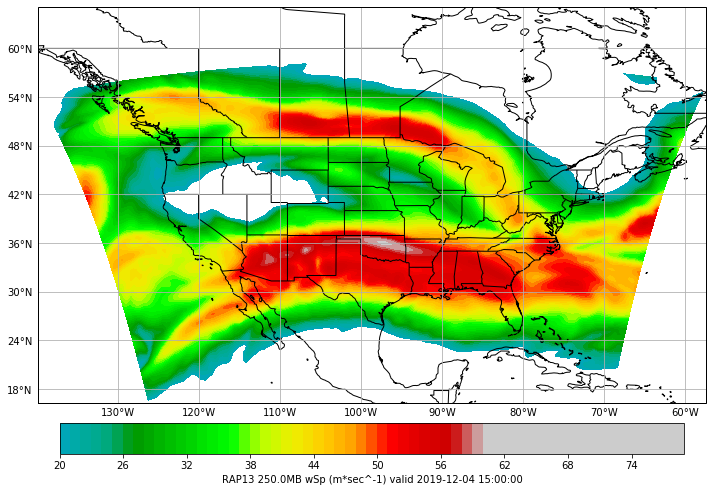

In [141]:
cycle_index = 0
cycle = str(cycles[cycle_index])


print(cycles[cycle_index])

fcstRun_index = 20
response = DataAccessLayer.getGridData(request, [fcstRun[fcstRun_index]])
grid = response[0]
data = grid.getRawData()

lons, lats = grid.getLatLonCoords()
bbox = [lons.min(), lons.max(), lats.min(), lats.max()]


time_string = str(grid.getDataTime().getRefTime()).replace(":","")[:-4]+"Z"
print(time_string)

cmap = plt.get_cmap('nipy_spectral')
fig2, ax2 = make_map(bbox=bbox)
levels = np.arange(20,80,1)
cs2 = ax2.contourf(lons, lats, data, levels, cmap=cmap,
                  vmin=data.min(), vmax=data.max())
#plt.title(str(grid.getLocationName()) +" " \
#              + str(grid.getLevel()) + " " \
#               + str(grid.getParameter()) \
#               + " (" + str(grid.getUnit()) + ") " \
#               + "valid " + str(grid.getDataTime().getRefTime()))
cbar2 = fig2.colorbar(cs2, shrink=0.7, orientation='horizontal',pad=0.04)
cbar2.set_label(str(grid.getLocationName()) +" " \
               + str(grid.getLevel()) + " " \
               + str(grid.getParameter()) \
               + " (" + str(grid.getUnit()) + ") " \
               + "valid " + str(grid.getDataTime()))#.getRefTime()))

#from geopy.geocoders import Nominatim
#import math

#cities = ["Colorado Springs",
#          "Boulder",
#          "Fort Collins",
#         "Denver"] #"Pueblo"

states = NaturalEarthFeature(category='cultural',
                               name='admin_1_states_provinces_lines',
                               scale='50m', facecolor='none')
ax2.add_feature(states, linestyle='-', edgecolor='black',linewidth=1)


political_boundaries = NaturalEarthFeature(category='cultural',
                               name='admin_0_boundary_lines_land',
                               scale='50m', facecolor='none')
#ax2.add_feature(cfeature.LAND)
#ax2.add_feature(cfeature.COASTLINE)

ax2.add_feature(political_boundaries, edgecolor='black')


cities = ["Denver"]

#geolocator = Nominatim()
#for city in cities:
#    print(city)
#    loc = geolocator.geocode(city)
    #x, y = plt(loc.longitude, loc.latitude)
#    ax2.plot(loc.longitude, loc.latitude,marker='+',color='k',markersize=10)
#    ax2.text(loc.longitude-0.05, loc.latitude+0.05,city,color='k')#linewidth=4,
plt.savefig(f"/Users/chowdahead/Desktop/ahh_{cycle}_{fcstRun_index}.png",bbox_inches="tight")

In [294]:
Grid = "RAP13"
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")
request.setLocationNames(Grid)
request.setParameters("wSp")
#request.setLevels("10.0FHAG")
request.setLevels("250.0MB")
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)

for i in range(0,21):

    cycle_index = 0
    cycle = str(cycles[cycle_index])

    fcstRun = DataAccessLayer.getForecastRun(cycles[cycle_index], times)
    print("init hour:",cycles[cycle_index])
    init_time = str(cycles[cycle_index]).replace(":","").replace("-","_").replace(" ","_")[:-2]+"Z"

    fcstRun_index = i
    response = DataAccessLayer.getGridData(request, [fcstRun[fcstRun_index]])
    grid = response[0]
    data = grid.getRawData()

    lons, lats = grid.getLatLonCoords()
    bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
    
    forecast_time = str(AWIPS_forecast_datetime(fcstRun,i)).replace(":","").replace("-","_").replace(" ","_")[:-2]+"Z"
    print(forecast_time)

    cmap = plt.get_cmap('nipy_spectral')
    fig2, ax2 = make_map(bbox=bbox)
    levels = np.arange(20,80,1)
    cs2 = ax2.contourf(lons, lats, data, levels, cmap=cmap) #vmin=data.min(), vmax=data.max()
    #plt.title(str(grid.getLocationName()) +" " \
    #              + str(grid.getLevel()) + " " \
    #               + str(grid.getParameter()) \
    #               + " (" + str(grid.getUnit()) + ") " \
    #               + "valid " + str(grid.getDataTime().getRefTime()))
    cbar2 = fig2.colorbar(cs2, shrink=0.7, orientation='horizontal',pad=0.04)
    cbar2.set_label(str(grid.getLocationName()) +" " \
                   + str(grid.getLevel()) + " " \
                   + str(grid.getParameter()) \
                   + " (" + str(grid.getUnit()) + ") " \
                   + "valid " + str(forecast_time))#.getRefTime()))

    #from geopy.geocoders import Nominatim
    #import math

    #cities = ["Colorado Springs",
    #          "Boulder",
    #          "Fort Collins",
    #         "Denver"] #"Pueblo"

    states = NaturalEarthFeature(category='cultural',
                                   name='admin_1_states_provinces_lines',
                                   scale='50m', facecolor='none')
    ax2.add_feature(states, linestyle='-', edgecolor='black',linewidth=1)


    political_boundaries = NaturalEarthFeature(category='cultural',
                                   name='admin_0_boundary_lines_land',
                                   scale='50m', facecolor='none')
    #ax2.add_feature(cfeature.LAND)
    #ax2.add_feature(cfeature.COASTLINE)

    ax2.add_feature(political_boundaries, edgecolor='black')


    cities = ["Denver"]

    #geolocator = Nominatim()
    #for city in cities:
    #    print(city)
    #    loc = geolocator.geocode(city)
        #x, y = plt(loc.longitude, loc.latitude)
    #    ax2.plot(loc.longitude, loc.latitude,marker='+',color='k',markersize=10)
    #    ax2.text(loc.longitude-0.05, loc.latitude+0.05,city,color='k')#linewidth=4,
    
    plt.savefig(f"/Users/chowdahead/Desktop/{Grid}_{init_time}_{forecast_time}.png",bbox_inches="tight")
    plt.close(fig2)

init hour: 2019-12-04 16:00:00
2019_12_04_1600Z
init hour: 2019-12-04 16:00:00
2019_12_04_1700Z
init hour: 2019-12-04 16:00:00
2019_12_04_1800Z
init hour: 2019-12-04 16:00:00
2019_12_04_1900Z
init hour: 2019-12-04 16:00:00
2019_12_04_2000Z
init hour: 2019-12-04 16:00:00
2019_12_04_2100Z
init hour: 2019-12-04 16:00:00
2019_12_04_2200Z
init hour: 2019-12-04 16:00:00
2019_12_04_2300Z
init hour: 2019-12-04 16:00:00
2019_12_05_0000Z
init hour: 2019-12-04 16:00:00
2019_12_05_0100Z
init hour: 2019-12-04 16:00:00
2019_12_05_0200Z
init hour: 2019-12-04 16:00:00
2019_12_05_0300Z
init hour: 2019-12-04 16:00:00
2019_12_05_0400Z
init hour: 2019-12-04 16:00:00
2019_12_05_0500Z
init hour: 2019-12-04 16:00:00
2019_12_05_0600Z
init hour: 2019-12-04 16:00:00
2019_12_05_0700Z
init hour: 2019-12-04 16:00:00
2019_12_05_0800Z
init hour: 2019-12-04 16:00:00
2019_12_05_0900Z
init hour: 2019-12-04 16:00:00
2019_12_05_1000Z
init hour: 2019-12-04 16:00:00
2019_12_05_1100Z
init hour: 2019-12-04 16:00:00
2019_12_0

https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00690

### "RAP forecasts are generated every hour with forecast lengths going out 18 hours with a 1 hour temporal resolution."

In [155]:
fcstRun[2].fcstTime

7200

In [200]:
str(fcstRun[7].getValidPeriod())[1:19]

'Dec 04 19 21:00:00'

In [199]:
fcstRun[7].getRefTime()

2019-12-04 14:00:00.000

In [172]:
# Hour forecast from init time
fcstRun[0].getFcstTime()/3600

0.0

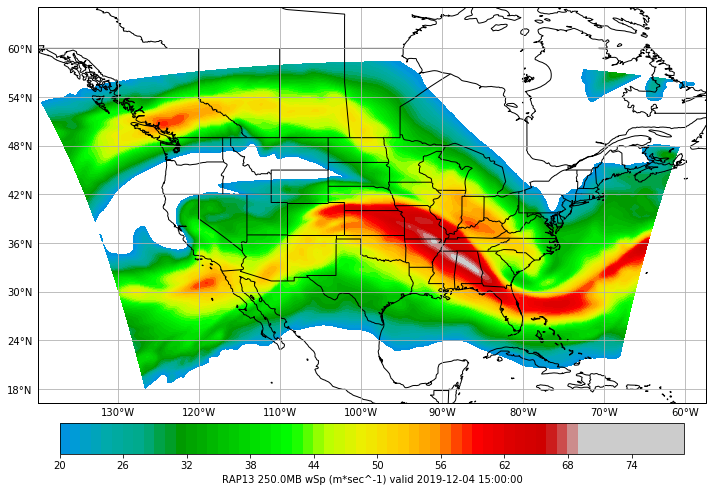

In [132]:
cmap = plt.get_cmap('nipy_spectral')
fig2, ax2 = make_map(bbox=bbox)
levels = np.arange(20,80,1)
cs2 = ax2.contourf(lons, lats, data, levels, cmap=cmap,
                  vmin=data.min(), vmax=data.max())
#plt.title(str(grid.getLocationName()) +" " \
#              + str(grid.getLevel()) + " " \
#               + str(grid.getParameter()) \
#               + " (" + str(grid.getUnit()) + ") " \
#               + "valid " + str(grid.getDataTime().getRefTime()))
cbar2 = fig2.colorbar(cs2, shrink=0.7, orientation='horizontal',pad=0.04)
cbar2.set_label(str(grid.getLocationName()) +" " \
               + str(grid.getLevel()) + " " \
               + str(grid.getParameter()) \
               + " (" + str(grid.getUnit()) + ") " \
               + "valid " + str(grid.getDataTime()))#.getRefTime()))

#from geopy.geocoders import Nominatim
#import math

#cities = ["Colorado Springs",
#          "Boulder",
#          "Fort Collins",
#         "Denver"] #"Pueblo"

states = NaturalEarthFeature(category='cultural',
                               name='admin_1_states_provinces_lines',
                               scale='50m', facecolor='none')
ax2.add_feature(states, linestyle='-', edgecolor='black',linewidth=1)


political_boundaries = NaturalEarthFeature(category='cultural',
                               name='admin_0_boundary_lines_land',
                               scale='50m', facecolor='none')
#ax2.add_feature(cfeature.LAND)
#ax2.add_feature(cfeature.COASTLINE)

ax2.add_feature(political_boundaries, edgecolor='black')


cities = ["Denver"]

#geolocator = Nominatim()
#for city in cities:
#    print(city)
#    loc = geolocator.geocode(city)
    #x, y = plt(loc.longitude, loc.latitude)
#    ax2.plot(loc.longitude, loc.latitude,marker='+',color='k',markersize=10)
#    ax2.text(loc.longitude-0.05, loc.latitude+0.05,city,color='k')#linewidth=4,
plt.savefig(f"/Users/chowdahead/Desktop/ahh_{cycle}_{fcstRun_index}.png",bbox_inches="tight")

In [14]:
from __future__ import print_function
from awips.dataaccess import DataAccessLayer
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import ShapelyFeature,NaturalEarthFeature
from shapely.geometry import Polygon
from shapely.ops import cascaded_union

# Standard map plot
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
            subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [17]:
# Define a WFO ID for location
# tie this ID to the mapdata.county column "cwa" for filtering
request.setLocationNames('BOU')
request.addIdentifier('cwa', 'BOU')

# enable location filtering (inLocation)
# locationField is tied to the above cwa definition (BOU)
request.addIdentifier('geomField', 'the_geom')
request.addIdentifier('inLocation', 'true')
request.addIdentifier('locationField', 'cwa')

# This is essentially the same as "'"select count(*) from mapdata.cwa where cwa='BOU';" (=1)

# Get response and create dict of county geometries
response = DataAccessLayer.getGeometryData(request, [])
counties = np.array([])
for ob in response:
    counties = np.append(counties,ob.getGeometry())
print("Using " + str(len(counties)) + " county MultiPolygons")


%matplotlib inline
# All WFO counties merged to a single Polygon
merged_counties = cascaded_union(counties)
envelope = merged_counties.buffer(2)
boundaries=[merged_counties]

# Get bounds of this merged Polygon to use as buffered map extent
bounds = merged_counties.bounds
print(bounds)
bbox=[bounds[0]-1,bounds[2]+1,bounds[1]-1.5,bounds[3]+1.5]


fig, ax = make_map(bbox=bbox)
# Plot political/state boundaries handled by Cartopy
political_boundaries = NaturalEarthFeature(category='cultural',
                               name='admin_0_boundary_lines_land',
                               scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural',
                               name='admin_1_states_provinces_lines',
                               scale='50m', facecolor='none')
ax.add_feature(political_boundaries, linestyle='-', edgecolor='black')
ax.add_feature(states, linestyle='-', edgecolor='black',linewidth=2)

# Plot CWA counties
for i, geom in enumerate(counties):
    cbounds = Polygon(geom)
    intersection = cbounds.intersection
    geoms = (intersection(geom)
         for geom in counties
         if cbounds.intersects(geom))
    shape_feature = ShapelyFeature(geoms,ccrs.PlateCarree(), 
                        facecolor='none', linestyle="-",edgecolor='#86989B')
    ax.add_feature(shape_feature)

Using 0 county MultiPolygons
()


IndexError: tuple index out of range

In [3]:
request = DataAccessLayer.newDataRequest()
request.setDatatype("warnings")

TypeError: __init__() missing 4 required positional arguments: 'message', 'category', 'filename', and 'lineno'